## Observations and Insights 

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = mouse_metadata.merge(study_results, how = "inner", on = "Mouse ID")

# Display the data table for preview
combined_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [59]:
 # Checking the number of mice.
combined_df['Mouse ID'].count()

1893

In [60]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [23]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
all_duplicate = combined_df[combined_df.duplicated(['Mouse ID'])]
all_duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [24]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates('Mouse ID')
clean_combined_df                                               

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [25]:
# Checking the number of mice in the clean DataFrame.
clean_combined_df['Mouse ID'].count()

249

## Summary Statistics

In [26]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mean = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_dev = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()


summary_stat_df = pd.DataFrame({'Mean': mean, 'Median': median, 'Variance': variance,
                                'Standard Deviation': std_dev, 'SEM':sem})
summary_stat_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
x = combined_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)': ['mean', 'median', 'var', 'std', 'sem']})

# Renaming columns
x.rename(columns = {'mean':'Mean', 'median':'Median', 'var':'Variance', 'std':'Standard Deviation', 'sem':'SEM'})




Tumor Volume (mm3)                                           \
                           Mean     Median   Variance Standard Deviation   
Drug Regimen                                                               
Capomulin             40.675741  41.557809  24.947764           4.994774   
Ceftamin              52.591172  51.776157  39.290177           6.268188   
Infubinol             52.884795  51.820584  43.128684           6.567243   
Ketapril              55.235638  53.698743  68.553577           8.279709   
Naftisol              54.331565  52.509285  66.173479           8.134708   
Placebo               54.033581  52.288934  61.168083           7.821003   
Propriva              52.322552  50.854632  42.351070           6.507770   
Ramicane              40.216745  40.673236  23.486704           4.846308   
Stelasyn              54.233149  52.431737  59.450562           7.710419   
Zoniferol             53.236507  51.818479  48.533355           6.966589   

                        
                   SEM  
Drug Regimen            
Capomulin     0.329346  
Ceftamin      0.469821  
Infubinol     0.492236  
Ketapril      0.603860  
Naftisol      0.596466  
Placebo       0.581331  
Propriva      0.512884  
Ramicane      0.320955  
Stelasyn      0.573111  
Zoniferol     0.516398

## Bar and Pie Charts

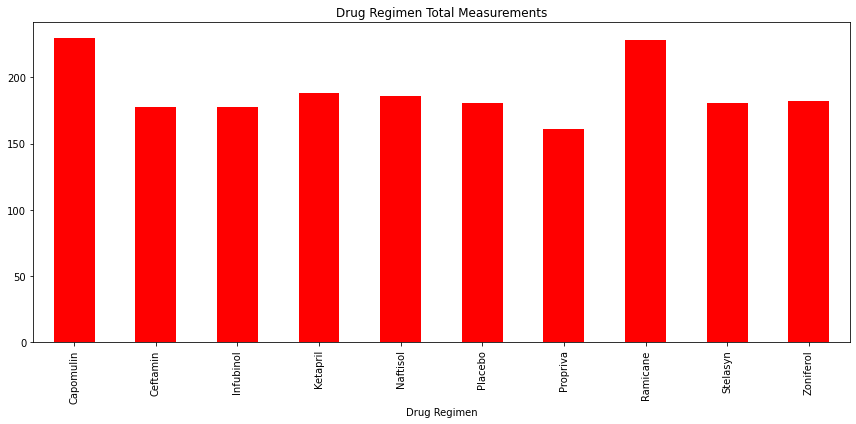

In [53]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
bar1 = combined_df.groupby(['Drug Regimen']).count()['Mouse ID']
bar1.plot(kind = 'bar', figsize = (12,6), color = 'red')

plt.title("Drug Regimen Total Measurements")
plt.xlabel("Drug Regimen")
plt.tight_layout()

Text(0.5, 0, 'Drug Regimen')

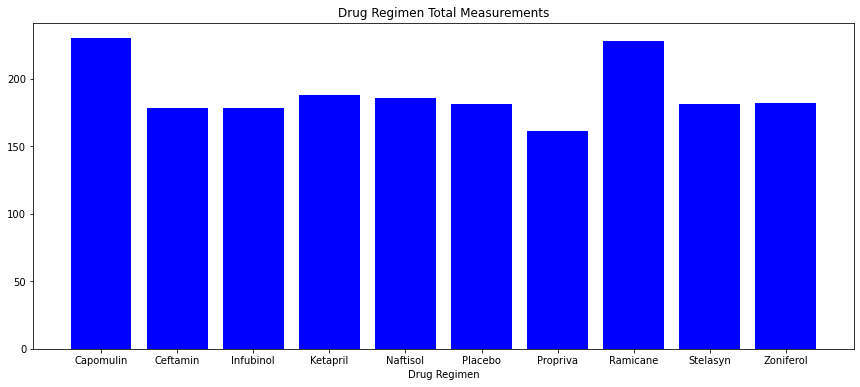

In [64]:
 # Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
    
plt.figure(figsize = (14.7,6))
plt.bar(drug_regimen, drug_count, color = 'blue', align = "center")
plt.title("Drug Regimen Total Measurements")
plt.xlabel("Drug Regimen")



<AxesSubplot:title={'center':'Female Vs. Male'}, ylabel='Mouse ID'>

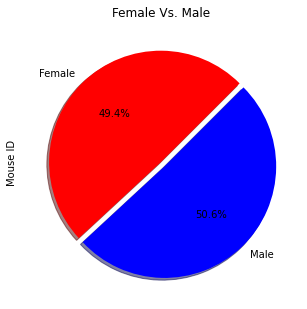

In [73]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie = combined_df.groupby(['Sex']).count()['Mouse ID']
colors = ['red','blue']
explode = (0, 0.05)
plt.title('Female Vs. Male')

pie.plot(kind = 'pie', figsize = (5,9),shadow = True, startangle = 45, 
         autopct = '%1.1f%%', colors = colors, explode = explode)


Text(0.5, 1.0, 'Female Vs. Male')

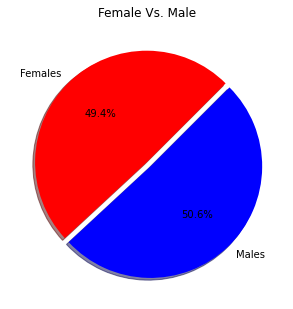

In [74]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# x-values
pie2 = combined_df.groupby(['Sex'])['Mouse ID'].count().to_list()
pie2

# y-values
labels = ['Females', 'Males']

#pie chart
color = ['red','blue']
plt.figure(figsize = (5,9))
explode = (0, 0.05)

plt.pie(pie2, labels=labels, colors = colors, autopct = '%1.1f%%', 
        shadow = True, startangle = 45, explode = explode)
plt.title('Female Vs. Male')


## Quartiles, Outliers and Boxplots

In [33]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
timepoint = combined_df.groupby(['Mouse ID'])['Timepoint'].max()
timepoint
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge = pd.merge(timepoint, combined_df, on=['Mouse ID','Timepoint'], how='left')
merge
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [35]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for x in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = merge.loc[merge['Drug Regimen'] == x, 'Tumor Volume (mm3)'] 
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([.25,.5,.75])
    lower = quartiles[0.25]
    upper = quartiles[0.75]
    iqr = upper - lower
    lower_bound = lower - (1.5 * iqr)
    upper_bound = upper + (1.5 * iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound)]
    outliers2 = tumor_volumes.loc[(tumor_volumes > upper_bound)]
    print(f"{x}'s potential outliers: {outliers}") 
    print(f"{x}'s potential outliers: {outliers2}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Infubinol's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


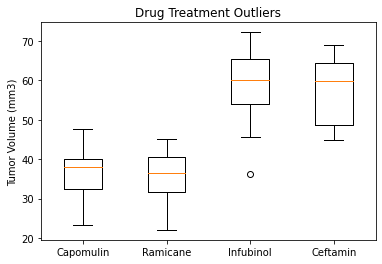

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot(tumor_vol_data, labels = treatments)
plt.ylabel('Tumor Volume (mm3)')
plt.title('Drug Treatment Outliers')
plt.show()

## Line and Scatter Plots

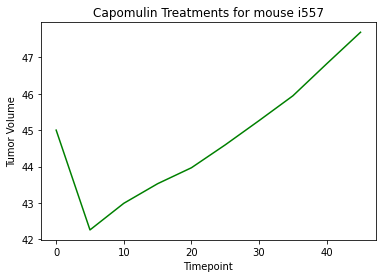

In [72]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
capomulin = combined_df.loc[combined_df['Drug Regimen'] == 'Capomulin']
capomulin
mouse = capomulin.loc[capomulin['Mouse ID'] == 'i557']
mouse
                      
plt.plot(mouse['Timepoint'],mouse['Tumor Volume (mm3)'], color='green')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume')
plt.title('Capomulin Treatments for mouse i557')
plt.show()

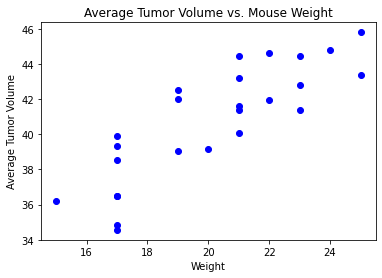

In [69]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg = capomulin.groupby(['Mouse ID']).mean()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'], color = 'blue')
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()

## Correlation and Regression

In [39]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(avg['Weight (g)'], avg['Tumor Volume (mm3)'])
print (round(correlation[0],2))

0.84


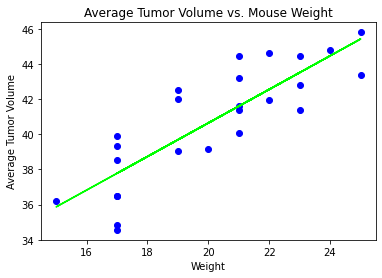

In [68]:
#Creating linear regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg['Weight (g)'], avg['Tumor Volume (mm3)'])

#finding regression by x values * the slope + intercept
regress_values = avg['Weight (g)'] * slope + intercept

#Creating the line equation
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))

#regression line
plt.plot(avg['Weight (g)'],regress_values, color = 'lime')

#scatter plot
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'], color = 'blue')
plt.title('Average Tumor Volume vs. Mouse Weight')
plt.xlabel('Weight')
plt.ylabel('Average Tumor Volume')
plt.show()